In [75]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

data = pd.read_csv('dataset2.csv')
data.head()

,date,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,5/15/2014,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,11/14/2014,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,12/24/2014,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,2/22/2015,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,1/6/2015,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0


<Axes: >

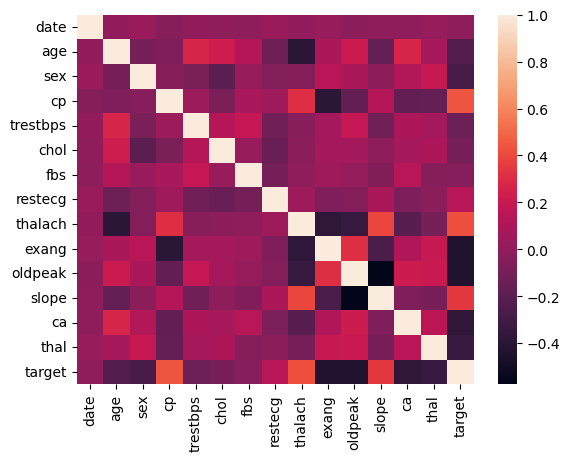

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['date'] = le.fit_transform(data['date'])
corr = data.corr()
sns.heatmap(corr)

<Axes: >

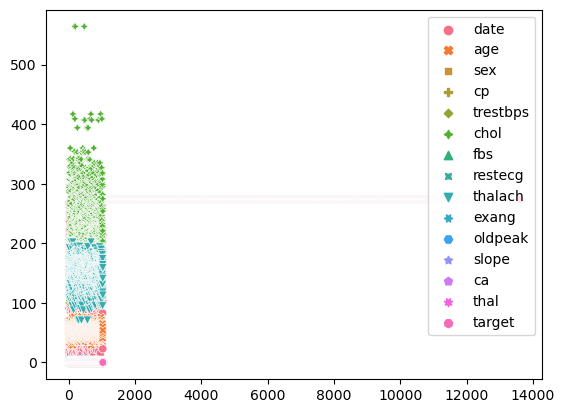

In [77]:
sns.scatterplot(data)

In [78]:
data.fillna(value=data.mean(), inplace=True)

In [79]:
data.head()

,date,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,154,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,48,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,71,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,91,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,17,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled, columns=data.columns)


In [88]:
from sklearn.decomposition import PCA
X= scaled_data.drop(['target'], axis =1)
y=scaled_data['target']

In [82]:
pca = PCA(n_components=10)
pca_data= pca.fit_transform(data)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_data,y, test_size=0.2, random_state=42)

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

In [93]:
print("R2 Score is:",r2)
print("Mean Square Error is:",mse)

R2 Score is: 0.9448843404746108
Mean Square Error is: 0.05862897218766784


In [94]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). In the general case when the true y is
    non-constant, a constant model that always predicts the average y
    disregarding the input features would get a :math:`R^2` score of 0.0.
    
    In the particular case when ``y_true`` is constant, the :math:`R^2` score
    is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
    (imperfect predictions). To prevent such non-finite numbers to pollute
    higher-level experiments such as a grid search cross-validation, by default
    these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
    predictions) respectively. You can set ``force_finite`` to ``False`` to
    